In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [15]:
dataset = pd.read_csv('G:/4-1 Thesis/my_thesis.csv')

In [16]:
dataset.head()

,ID,Category,Subcategory,Pricing,Link,Sales,Stars
0,1,"Graphics & Design,Programmimg & Tech","Logo Design,Wordpress","125,200",designsbysaba | Profile | Fiverr,"479,1","4.9,5"
1,2,Graphics & Design,"Logo Design,Brand Style Guides","70,40",borydesign | Profile | Fiverr,"1k+,43","4.9,5"
2,3,Graphics & Design,"Logo Design,Flyer Design,Business Cards and St...","40,50,30,40",adripoggetti | Profile | Fiverr,"1k+,203,93,12","4.9,5,4.9,5"
3,4,"Graphics & Design,Programmimg & Tech","Logo Design,Wordpress","300,995",graphic_traffic | Profile | Fiverr,"487,2","5,5"
4,5,Graphics & Design,"Logo Design,Packaging Design,Label Design","50,80,80",lowobiru | Profile | Fiverr,"1K+,5,2","4.9,4.3,5"


In [17]:
#print(dataset.shape)
#print(dataset.columns) 
#print(dataset.head(10))
#print(dataset.describe())


In [18]:
column_list = []
for index, rows in dataset.iterrows():
    my_string = rows.Subcategory
    my_list = my_string.split(",")
    column_list.append(my_list)
print(column_list)

[['Logo Design', 'Wordpress'], ['Logo Design', 'Brand Style Guides'], ['Logo Design', 'Flyer Design', 'Business Cards and Stationery', 'Social Media Design'], ['Logo Design', 'Wordpress'], ['Logo Design', 'Packaging Design', 'Label Design'], ['Brand Style Guides', 'Logo Design'], ['Brand Style Guides', 'Business Cards and Stationery ', 'Logo Design'], ['Brand Style Guides', 'Business Cards and Stationery ', 'Logo Design', 'Social Media Design'], ['Brand Style Guides', 'Business Cards and Stationery ', 'Logo Design', 'Vector Tracing'], ['Logo Design', 'Brand Style Guides'], ['Illustration', 'Game Art', 'Backgrounds & Environments'], ['Illustration', 'Game Art', 'Translation', 'Portraits & Caricatures', 'Pattern Design'], ['Game Art', 'Illustration'], ['Graphics for Streamers', 'Social Media Design'], ['Graphics for Streamers', 'Logo Design', 'NFT Art', 'Illustration'], ['Graphics for Streamers', 'NFT Art', 'Illustration'], ['Graphics for Streamers', 'Cartoons & Comics', 'Illustration'],

In [19]:
#from mlxtend.preprocessing import TransactionEncoder
#te = TransactionEncoder()
#te_array = te.fit(column_list).transform(column_list)
#df = pd.DataFrame(te_array, columns=te.columns_)


In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(column_list).transform(column_list)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Backgrounds & Environments,Brand Style Guides,Brochure Design,Business Cards and Stationery,Business Cards and Stationery,Cartoons & Comics,Catalog Design,Content Marketing,Flyer Design,Game Art,...,SEO,Social Media Advertising,Social Media Copy,Social Media Design,Social Media Marketing,Translation,Vector Tracing,Web Analytics,Whiteboard & Animated Explainers,Wordpress
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((35, 1),
                                frequency
 Logo Design                           15
 Illustration                           7
 Business Cards and Stationery          6
 Brand Style Guides                     6
 SEO                                    5
 Graphics for Streamers                 5
 Social Media Marketing                 5
 Social Media Design                    5
 Flyer Design                           4
 Wordpress                              3)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

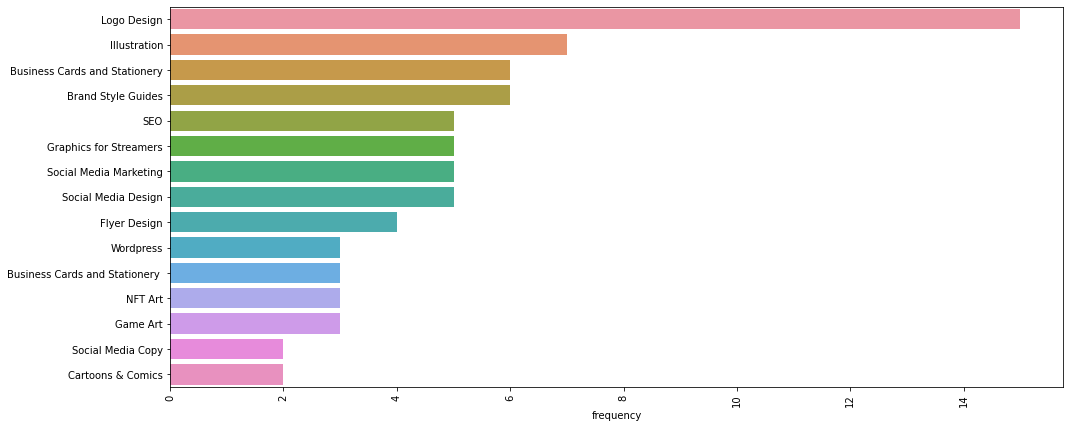

In [22]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:15], x=item_freq_df.frequency[:15])
plt.xticks(rotation=90)

In [25]:
freq_itemset_support = apriori(transaction_df, min_support=0.1, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.176471,(Brand Style Guides)
1,0.176471,(Business Cards and Stationery)
2,0.117647,(Flyer Design)
3,0.147059,(Graphics for Streamers)
4,0.205882,(Illustration)
5,0.441176,(Logo Design)
6,0.147059,(SEO)
7,0.147059,(Social Media Design)
8,0.147059,(Social Media Marketing)
9,0.176471,"(Logo Design, Brand Style Guides)"


In [26]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.5)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Brand Style Guides),(Logo Design),0.176471,0.441176,0.176471,1.000000,2.266667,0.098616,inf
1,(Business Cards and Stationery),(Flyer Design),0.176471,0.117647,0.117647,0.666667,5.666667,0.096886,2.647059
2,(Flyer Design),(Business Cards and Stationery),0.117647,0.176471,0.117647,1.000000,5.666667,0.096886,inf
3,(Business Cards and Stationery),(Logo Design),0.176471,0.441176,0.117647,0.666667,1.511111,0.039792,1.676471
4,(Graphics for Streamers),(Illustration),0.147059,0.205882,0.117647,0.800000,3.885714,0.087370,3.970588
5,(Illustration),(Graphics for Streamers),0.205882,0.147059,0.117647,0.571429,3.885714,0.087370,1.990196
